In [35]:
# Importing Libraries
import numpy as np # LIBRARY IMPORT FOR LINEAR ALGEBRA
import pandas as pd # LIBRARY IMPORT FOR DATA PROCESSING
from sklearn.model_selection import train_test_split # MODULE IMPORT FOR DATA SPLITTING
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout


In [39]:
Stock_Data = pd.read_csv("C:/Users/saiko/OneDrive/Desktop/657/Assign-3/New folder/data/q2_dataset.csv")
store_data=np.zeros((1258,13))

In [40]:
for i in range(3, len(Stock_Data)):
        # Open prices
    store_data[i-3, 0] = Stock_Data.iloc[i-3, 3]  # open -1
    store_data[i-3, 1] = Stock_Data.iloc[i-2, 3]  # open -2
    store_data[i-3, 2] = Stock_Data.iloc[i-1, 3]  # open -3

        # High prices
    store_data[i-3, 3] = Stock_Data.iloc[i-3, 4]  # high -1
    store_data[i-3, 4] = Stock_Data.iloc[i-2, 4]  # high -2
    store_data[i-3, 5] = Stock_Data.iloc[i-1, 4]  # high -3

        # Low prices
    store_data[i-3, 6] = Stock_Data.iloc[i-3, 5]  # low -1
    store_data[i-3, 7] = Stock_Data.iloc[i-2, 5]  # low -2
    store_data[i-3, 8] = Stock_Data.iloc[i-1, 5]  # low -3

        # Volume
    store_data[i-3, 9] = Stock_Data.iloc[i-3, 2]  # volume -1
    store_data[i-3, 10] = Stock_Data.iloc[i-2, 2]  # volume -2
    store_data[i-3, 11] = Stock_Data.iloc[i-1, 2]  # volume -3

        # Target (next day's opening price)
    store_data[i-3, 12] = Stock_Data.iloc[i, 3]  # targe

In [41]:
col_names=['Open-1','Open-2','Open-3','High-1','High-2','High-3','Low-1','Low-2','Low-3','Volume-1','Volume-2','Volume-3','Target']

In [42]:
df = pd.DataFrame(store_data[:-2, :], columns=col_names)

In [43]:
df

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3,Target
0,376.72,375.41,370.00,381.50,378.62,375.78,376.36,372.23,369.87,29272970.0,28106110.0,29663910.0,367.85
1,375.41,370.00,367.85,378.62,375.78,370.47,372.23,369.87,363.64,28106110.0,29663910.0,28510370.0,365.12
2,370.00,367.85,365.12,375.78,370.47,367.36,369.87,363.64,363.91,29663910.0,28510370.0,27684310.0,360.08
3,367.85,365.12,360.08,370.47,367.36,365.98,363.64,363.91,360.00,28510370.0,27684310.0,35055820.0,353.25
4,365.12,360.08,353.25,367.36,365.98,362.17,363.91,360.00,351.28,27684310.0,35055820.0,32661520.0,364.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,130.97,129.08,127.74,132.97,129.62,128.57,130.70,128.31,127.35,55204920.0,45970470.0,35987630.0,125.72
1252,129.08,127.74,125.72,129.62,128.57,127.15,128.31,127.35,125.58,45970470.0,35987630.0,33559770.0,126.04
1253,127.74,125.72,126.04,128.57,127.15,126.37,127.35,125.58,125.04,35987630.0,33559770.0,31695870.0,125.03
1254,125.72,126.04,125.03,127.15,126.37,125.76,125.58,125.04,124.32,33559770.0,31695870.0,41365600.0,121.94


In [44]:
df_new=df.drop(['Target'],axis=1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_new, df['Target'], test_size=0.3, random_state = 42) 

In [46]:
X_train = X_train.reset_index(drop=True)

In [47]:
X_test = X_test.reset_index(drop=True)

In [48]:
y_train = y_train.reset_index(drop=True)

In [49]:
y_test = y_test.reset_index(drop=True)

In [50]:
test_data=pd.concat([X_test,y_test],axis=1)

In [51]:
train_data = pd.concat([X_train,y_train],axis=1)

In [52]:
train_data.to_csv("train_data_RNN.csv", index=False, header=True)
test_data.to_csv("test_data_RNN.csv", index=False, header=True)

In [53]:
label = train_data['Target']
label

0      117.52
1      111.13
2      161.94
3      165.67
4      250.74
        ...  
874     93.33
875     97.20
876    100.56
877    127.03
878    100.55
Name: Target, Length: 879, dtype: float64

In [54]:
train_data=train_data.drop(['Target'],axis=1)

In [55]:
train_data

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3
0,115.19,116.04,117.64,115.39,116.94,117.69,112.85,115.51,115.08,46810020.0,29158640.0,46301930.0
1,111.60,110.78,111.43,112.20,112.03,112.47,110.27,110.07,111.39,36151450.0,28507780.0,27054320.0
2,157.50,157.86,160.52,157.89,159.50,160.71,155.11,156.72,157.84,26330070.0,27391950.0,27377960.0
3,164.00,164.12,162.62,164.33,165.73,165.42,160.63,163.37,162.41,35617230.0,27850370.0,28331540.0
4,240.34,246.50,255.60,245.15,248.72,262.49,236.90,239.13,252.00,41483490.0,44054640.0,49250500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
874,90.00,92.72,93.48,91.67,92.78,93.57,90.00,89.47,92.46,44223040.0,76183460.0,28641180.0
875,100.51,97.65,96.86,100.89,100.77,98.23,99.64,97.42,96.65,33136130.0,50303500.0,35131460.0
876,98.97,98.55,98.68,99.06,99.11,100.13,97.34,96.76,96.43,49687870.0,70722000.0,80742460.0
877,129.13,128.31,127.98,130.50,129.19,129.39,128.90,128.16,127.78,26784530.0,24460160.0,33671250.0


In [56]:
scaler=MinMaxScaler(feature_range=(0,1))
train_data=scaler.fit_transform(train_data)

In [57]:
train_data

array([[0.08785575, 0.09123717, 0.09871429, ..., 0.23550268, 0.11651798,
        0.23212713],
       [0.07533482, 0.07280754, 0.07653571, ..., 0.16469124, 0.11218551,
        0.10425341],
       [0.23542132, 0.23776322, 0.25185714, ..., 0.09944177, 0.10475794,
        0.10640355],
       ...,
       [0.03128488, 0.0299569 , 0.031     , ..., 0.25462201, 0.39318626,
        0.46093677],
       [0.13647461, 0.13422795, 0.13564286, ..., 0.10246103, 0.08524235,
        0.14821375],
       [0.02162388, 0.0278897 , 0.03685714, ..., 0.45172573, 0.34178537,
        0.33831762]])

In [58]:
train_data = np.expand_dims(train_data, axis=2)

In [59]:
X_train, X_val, y_train, y_val = train_test_split(train_data, label, test_size=0.2, random_state=42)

In [60]:
X_train

array([[[0.08789062],
        [0.09200799],
        [0.09417857],
        ...,
        [0.22716681],
        [0.13850261],
        [0.22466947]],

       [[0.61826869],
        [0.61875898],
        [0.62707143],
        ...,
        [0.08192574],
        [0.        ],
        [0.03337799]],

       [[0.24337333],
        [0.23790337],
        [0.23832143],
        ...,
        [0.0505423 ],
        [0.08280033],
        [0.03325615]],

       ...,

       [[0.08039202],
        [0.088259  ],
        [0.08971429],
        ...,
        [0.15368078],
        [0.23486166],
        [0.45443553]],

       [[0.28738839],
        [0.29659087],
        [0.29592857],
        ...,
        [0.13474707],
        [0.11016764],
        [0.16404761]],

       [[0.09350586],
        [0.09411023],
        [0.09732143],
        ...,
        [0.07418022],
        [0.08284593],
        [0.05723548]]])

In [61]:


    # 2. Train your network
model = Sequential()
    #adding LSTM layer with 50 LSTM units
model.add(LSTM(50,input_shape=(X_train.shape[1],1),return_sequences=True))
model.add(Dropout(0.2)) 
model.add(LSTM(150))
model.add(Dropout(0.2)) 
    #adding dense layer
model.add(Dense(1,activation='linear'))

    #'mean_absolute_error' has been used as loss function

model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mae'])

In [62]:
History = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=600,batch_size=64,verbose=1)

Epoch 1/600
11/11 [==============================] - 20s 485ms/step - loss: 169.9521 - mae: 169.9521 - val_loss: 166.6666 - val_mae: 166.6666
Epoch 2/600
11/11 [==============================] - 1s 110ms/step - loss: 162.3579 - mae: 162.3579 - val_loss: 158.9288 - val_mae: 158.9288
Epoch 3/600
11/11 [==============================] - 1s 123ms/step - loss: 154.2990 - mae: 154.2990 - val_loss: 155.2444 - val_mae: 155.2444
Epoch 4/600
11/11 [==============================] - 1s 132ms/step - loss: 151.3630 - mae: 151.3630 - val_loss: 152.9252 - val_mae: 152.9252
Epoch 5/600
11/11 [==============================] - 1s 90ms/step - loss: 149.2353 - mae: 149.2353 - val_loss: 150.8660 - val_mae: 150.8660
Epoch 6/600
11/11 [==============================] - 1s 100ms/step - loss: 147.2414 - mae: 147.2414 - val_loss: 148.9098 - val_mae: 148.9098
Epoch 7/600
11/11 [==============================] - 1s 105ms/step - loss: 145.2894 - mae: 145.2894 - val_loss: 147.0147 - val_mae: 147.0147
Epoch 8/600
1

Epoch 60/600
11/11 [==============================] - 0s 24ms/step - loss: 63.1927 - mae: 63.1927 - val_loss: 64.6317 - val_mae: 64.6317
Epoch 61/600
11/11 [==============================] - 0s 26ms/step - loss: 62.5778 - mae: 62.5778 - val_loss: 63.9528 - val_mae: 63.9528
Epoch 62/600
11/11 [==============================] - 0s 26ms/step - loss: 62.1290 - mae: 62.1290 - val_loss: 63.3131 - val_mae: 63.3132
Epoch 63/600
11/11 [==============================] - 0s 23ms/step - loss: 61.5091 - mae: 61.5091 - val_loss: 62.7106 - val_mae: 62.7106
Epoch 64/600
11/11 [==============================] - 0s 23ms/step - loss: 61.0655 - mae: 61.0655 - val_loss: 62.1343 - val_mae: 62.1343
Epoch 65/600
11/11 [==============================] - 0s 23ms/step - loss: 60.7650 - mae: 60.7650 - val_loss: 61.6014 - val_mae: 61.6014
Epoch 66/600
11/11 [==============================] - 0s 25ms/step - loss: 60.1361 - mae: 60.1361 - val_loss: 61.1216 - val_mae: 61.1216
Epoch 67/600
11/11 [=====================

11/11 [==============================] - 0s 23ms/step - loss: 50.3786 - mae: 50.3786 - val_loss: 47.4209 - val_mae: 47.4209
Epoch 120/600
11/11 [==============================] - 0s 23ms/step - loss: 50.2515 - mae: 50.2515 - val_loss: 47.3092 - val_mae: 47.3092
Epoch 121/600
11/11 [==============================] - 0s 23ms/step - loss: 50.4473 - mae: 50.4473 - val_loss: 47.1986 - val_mae: 47.1986
Epoch 122/600
11/11 [==============================] - 0s 23ms/step - loss: 50.1527 - mae: 50.1527 - val_loss: 47.1062 - val_mae: 47.1062
Epoch 123/600
11/11 [==============================] - 0s 23ms/step - loss: 50.4841 - mae: 50.4841 - val_loss: 47.0098 - val_mae: 47.0098
Epoch 124/600
11/11 [==============================] - 0s 24ms/step - loss: 49.6773 - mae: 49.6773 - val_loss: 46.9164 - val_mae: 46.9164
Epoch 125/600
11/11 [==============================] - 0s 24ms/step - loss: 50.1552 - mae: 50.1552 - val_loss: 46.8158 - val_mae: 46.8158
Epoch 126/600
11/11 [===========================

11/11 [==============================] - 0s 25ms/step - loss: 22.9562 - mae: 22.9562 - val_loss: 46.5504 - val_mae: 46.5504
Epoch 179/600
11/11 [==============================] - 0s 25ms/step - loss: 22.9590 - mae: 22.9590 - val_loss: 46.3876 - val_mae: 46.3876
Epoch 180/600
11/11 [==============================] - 0s 23ms/step - loss: 22.4828 - mae: 22.4828 - val_loss: 46.3774 - val_mae: 46.3774
Epoch 181/600
11/11 [==============================] - 0s 24ms/step - loss: 22.5524 - mae: 22.5524 - val_loss: 46.4909 - val_mae: 46.4909
Epoch 182/600
11/11 [==============================] - 0s 23ms/step - loss: 21.4817 - mae: 21.4817 - val_loss: 46.2640 - val_mae: 46.2640
Epoch 183/600
11/11 [==============================] - 0s 24ms/step - loss: 21.7329 - mae: 21.7329 - val_loss: 45.8263 - val_mae: 45.8263
Epoch 184/600
11/11 [==============================] - 0s 23ms/step - loss: 21.5827 - mae: 21.5827 - val_loss: 45.1434 - val_mae: 45.1434
Epoch 185/600
11/11 [===========================

11/11 [==============================] - 0s 23ms/step - loss: 14.4758 - mae: 14.4758 - val_loss: 44.4176 - val_mae: 44.4176
Epoch 238/600
11/11 [==============================] - 0s 23ms/step - loss: 14.4909 - mae: 14.4909 - val_loss: 44.6087 - val_mae: 44.6087
Epoch 239/600
11/11 [==============================] - 0s 22ms/step - loss: 14.2128 - mae: 14.2128 - val_loss: 44.7737 - val_mae: 44.7737
Epoch 240/600
11/11 [==============================] - 0s 23ms/step - loss: 13.9971 - mae: 13.9971 - val_loss: 45.4516 - val_mae: 45.4516
Epoch 241/600
11/11 [==============================] - 0s 24ms/step - loss: 13.8808 - mae: 13.8808 - val_loss: 45.4173 - val_mae: 45.4173
Epoch 242/600
11/11 [==============================] - 0s 24ms/step - loss: 14.4782 - mae: 14.4782 - val_loss: 45.2792 - val_mae: 45.2792
Epoch 243/600
11/11 [==============================] - 0s 24ms/step - loss: 13.5848 - mae: 13.5848 - val_loss: 45.6716 - val_mae: 45.6716
Epoch 244/600
11/11 [===========================

11/11 [==============================] - 0s 24ms/step - loss: 10.3517 - mae: 10.3517 - val_loss: 51.3088 - val_mae: 51.3088
Epoch 297/600
11/11 [==============================] - 0s 24ms/step - loss: 10.3915 - mae: 10.3915 - val_loss: 51.4070 - val_mae: 51.4070
Epoch 298/600
11/11 [==============================] - 0s 25ms/step - loss: 10.3854 - mae: 10.3854 - val_loss: 51.7282 - val_mae: 51.7282
Epoch 299/600
11/11 [==============================] - 0s 24ms/step - loss: 10.9441 - mae: 10.9441 - val_loss: 52.3436 - val_mae: 52.3436
Epoch 300/600
11/11 [==============================] - 0s 23ms/step - loss: 10.1841 - mae: 10.1841 - val_loss: 53.3646 - val_mae: 53.3646
Epoch 301/600
11/11 [==============================] - 0s 23ms/step - loss: 10.3324 - mae: 10.3324 - val_loss: 54.3422 - val_mae: 54.3422
Epoch 302/600
11/11 [==============================] - 0s 24ms/step - loss: 10.5167 - mae: 10.5167 - val_loss: 53.7880 - val_mae: 53.7880
Epoch 303/600
11/11 [===========================

11/11 [==============================] - 0s 24ms/step - loss: 8.2698 - mae: 8.2698 - val_loss: 70.2558 - val_mae: 70.2558
Epoch 357/600
11/11 [==============================] - 0s 26ms/step - loss: 8.2054 - mae: 8.2054 - val_loss: 81.1976 - val_mae: 81.1976
Epoch 358/600
11/11 [==============================] - 0s 24ms/step - loss: 8.6130 - mae: 8.6130 - val_loss: 80.6478 - val_mae: 80.6478
Epoch 359/600
11/11 [==============================] - 0s 24ms/step - loss: 8.3948 - mae: 8.3948 - val_loss: 86.9063 - val_mae: 86.9063
Epoch 360/600
11/11 [==============================] - 0s 25ms/step - loss: 8.4614 - mae: 8.4614 - val_loss: 85.5897 - val_mae: 85.5897
Epoch 361/600
11/11 [==============================] - 0s 24ms/step - loss: 8.4522 - mae: 8.4522 - val_loss: 87.8768 - val_mae: 87.8768
Epoch 362/600
11/11 [==============================] - 0s 22ms/step - loss: 8.2346 - mae: 8.2346 - val_loss: 85.5498 - val_mae: 85.5498
Epoch 363/600
11/11 [==============================] - 0s 22ms

11/11 [==============================] - 0s 25ms/step - loss: 7.7754 - mae: 7.7754 - val_loss: 103.7604 - val_mae: 103.7604
Epoch 417/600
11/11 [==============================] - 0s 23ms/step - loss: 7.5768 - mae: 7.5768 - val_loss: 104.0351 - val_mae: 104.0351
Epoch 418/600
11/11 [==============================] - 0s 22ms/step - loss: 7.6652 - mae: 7.6652 - val_loss: 105.6291 - val_mae: 105.6291
Epoch 419/600
11/11 [==============================] - 0s 24ms/step - loss: 7.2837 - mae: 7.2837 - val_loss: 93.5253 - val_mae: 93.5253
Epoch 420/600
11/11 [==============================] - 0s 24ms/step - loss: 7.8787 - mae: 7.8787 - val_loss: 94.2388 - val_mae: 94.2388
Epoch 421/600
11/11 [==============================] - 0s 24ms/step - loss: 7.3631 - mae: 7.3631 - val_loss: 101.9363 - val_mae: 101.9363
Epoch 422/600
11/11 [==============================] - 0s 22ms/step - loss: 7.5502 - mae: 7.5502 - val_loss: 105.3724 - val_mae: 105.3724
Epoch 423/600
11/11 [==============================]

Epoch 476/600
11/11 [==============================] - 0s 23ms/step - loss: 7.2936 - mae: 7.2936 - val_loss: 111.7474 - val_mae: 111.7474
Epoch 477/600
11/11 [==============================] - 0s 23ms/step - loss: 7.3753 - mae: 7.3753 - val_loss: 111.3273 - val_mae: 111.3273
Epoch 478/600
11/11 [==============================] - 0s 25ms/step - loss: 7.0292 - mae: 7.0292 - val_loss: 104.2739 - val_mae: 104.2739
Epoch 479/600
11/11 [==============================] - 0s 23ms/step - loss: 7.2181 - mae: 7.2181 - val_loss: 110.3378 - val_mae: 110.3378
Epoch 480/600
11/11 [==============================] - 0s 23ms/step - loss: 6.8757 - mae: 6.8757 - val_loss: 112.3619 - val_mae: 112.3619
Epoch 481/600
11/11 [==============================] - 0s 25ms/step - loss: 7.4369 - mae: 7.4369 - val_loss: 114.9153 - val_mae: 114.9153
Epoch 482/600
11/11 [==============================] - 0s 25ms/step - loss: 7.2657 - mae: 7.2657 - val_loss: 113.1071 - val_mae: 113.1071
Epoch 483/600
11/11 [=============

11/11 [==============================] - 0s 24ms/step - loss: 7.1855 - mae: 7.1855 - val_loss: 129.9116 - val_mae: 129.9116
Epoch 536/600
11/11 [==============================] - 0s 24ms/step - loss: 7.0794 - mae: 7.0794 - val_loss: 129.5377 - val_mae: 129.5377
Epoch 537/600
11/11 [==============================] - 0s 25ms/step - loss: 7.0619 - mae: 7.0619 - val_loss: 128.7996 - val_mae: 128.7996
Epoch 538/600
11/11 [==============================] - 0s 23ms/step - loss: 7.4399 - mae: 7.4399 - val_loss: 129.5536 - val_mae: 129.5536
Epoch 539/600
11/11 [==============================] - 0s 25ms/step - loss: 6.7394 - mae: 6.7394 - val_loss: 130.5544 - val_mae: 130.5544
Epoch 540/600
11/11 [==============================] - 0s 26ms/step - loss: 6.8144 - mae: 6.8144 - val_loss: 129.6851 - val_mae: 129.6851
Epoch 541/600
11/11 [==============================] - 0s 23ms/step - loss: 6.5851 - mae: 6.5851 - val_loss: 128.8940 - val_mae: 128.8940
Epoch 542/600
11/11 [===========================

11/11 [==============================] - 0s 25ms/step - loss: 6.9392 - mae: 6.9392 - val_loss: 131.8271 - val_mae: 131.8271
Epoch 595/600
11/11 [==============================] - 0s 25ms/step - loss: 6.9428 - mae: 6.9428 - val_loss: 132.7727 - val_mae: 132.7727
Epoch 596/600
11/11 [==============================] - 0s 25ms/step - loss: 6.9403 - mae: 6.9403 - val_loss: 132.6039 - val_mae: 132.6039
Epoch 597/600
11/11 [==============================] - 0s 25ms/step - loss: 7.0029 - mae: 7.0029 - val_loss: 132.6412 - val_mae: 132.6412
Epoch 598/600
11/11 [==============================] - 0s 25ms/step - loss: 6.8313 - mae: 6.8313 - val_loss: 131.9401 - val_mae: 131.9401
Epoch 599/600
11/11 [==============================] - 0s 27ms/step - loss: 7.2415 - mae: 7.2415 - val_loss: 131.7455 - val_mae: 131.7455
Epoch 600/600
11/11 [==============================] - 0s 25ms/step - loss: 7.0566 - mae: 7.0566 - val_loss: 134.4429 - val_mae: 134.4429


In [63]:
X_test=scaler.transform(X_test)

In [64]:
X_test = np.expand_dims(X_test, axis=2)

In [ ]:
X_test.shape

In [65]:
y_pred = model.predict(X_test)

12/12 [==============================] - 1s 5ms/step


In [66]:
scores=model.evaluate(X_test,y_test)

12/12 [==============================] - 1s 5ms/step - loss: 4.0862 - mae: 4.0862


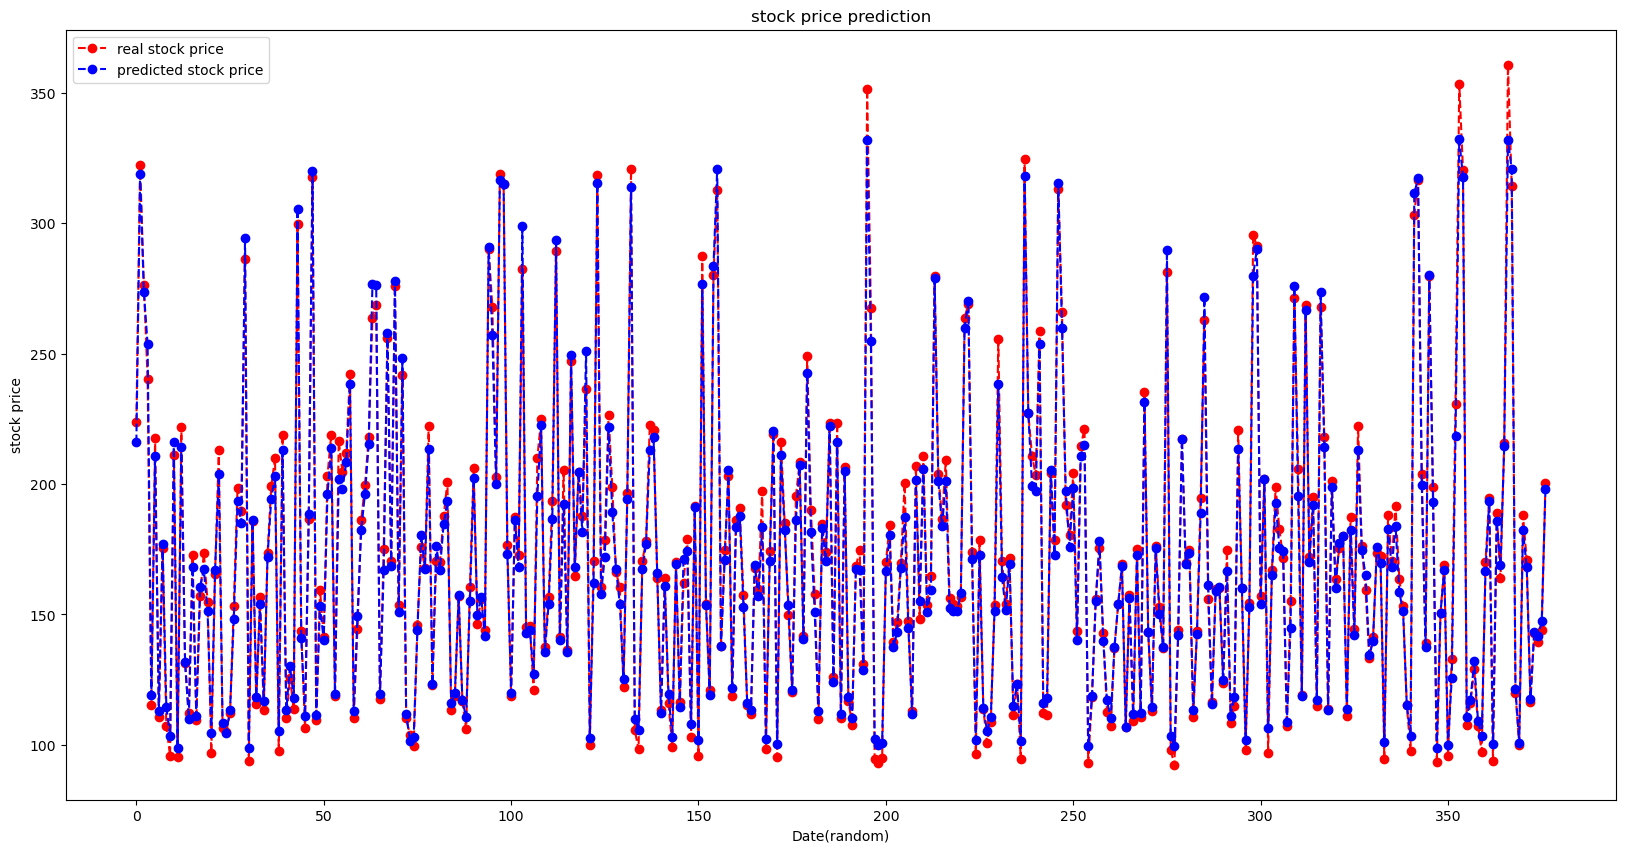

In [67]:
plt.figure(figsize=(20,10))
plt.plot(y_test, color="red", marker='o', linestyle='dashed', label="real stock price")
plt.plot(y_pred, color="blue", marker='o', linestyle='dashed', label="predicted stock price")
plt.title("stock price prediction")
plt.xlabel("Date(random)")
plt.ylabel("stock price")
plt.legend()
plt.show()